# FFT with Python

In [104]:
#load py packages needed
import numpy as np
from matplotlib import pyplot as plt 
from scipy import signal

In [105]:
maxt=100  #even
#maxt=101   #odd
dt=1. #1h
T=(maxt-1)*dt #time period of the whole time series

fq1=2/T
fq2=10/T
fq3=4/T

ttt=np.arange(0,maxt,1)*dt
sin1=np.sin(fq1*2*np.pi*ttt)
sin2=np.sin(fq2*2*np.pi*ttt)
sin3=np.sin(fq3*2*np.pi*ttt)
tot=sin1+sin2
tot2=sin3

(0, 99.0)

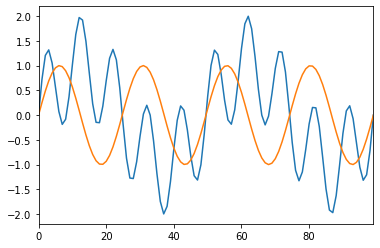

In [106]:
plt.plot(ttt,tot)
plt.plot(ttt,tot2)
plt.xlim(0,T)

In [107]:
fc=np.fft.fft(tot)                     # Fourier coefficients (FC)
fq=np.fft.fftfreq(ttt.shape[-1],dt)    # Frquencies corresponding to each FC. Units are cycles/h
fc_amp=fc.real*fc.real+fc.imag*fc.imag # Amplitude of FC |a+ib|^2=sqrt(a^2+b^2)^2=a^2+b^2
print(fc[0], fq[0])
print(fc[1],fq[1]*T)
print(fc[2],fq[2]*T)
print(fc[99],fq[99]*T)

(-5.440092820663267e-15+0j) 0.0
(0.023605056364341542-0.7511250726313214j) 0.99
(3.134122119962136-49.81544458188844j) 1.98
(0.02360505636434146+0.7511250726313213j) -0.99


(0, 12)

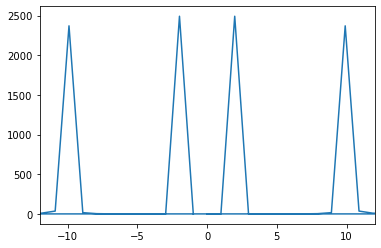

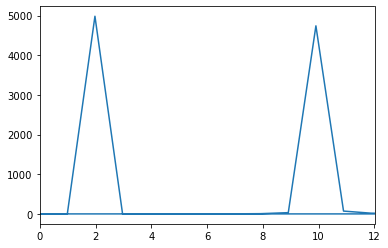

In [108]:
plt.plot(fq*T,fc_amp)
#plt.plot(fc_amp)
plt.xlim(-12,12)

plt.figure()
plt.plot(fq*T,fc_amp*2)
plt.xlim(0,12)

In [109]:
fq[0]
#fq[1]*len(tot)
#fq[49]*len(tot)
#fq[50]*len(tot)
#fq[51]*len(tot)

0.0

In [110]:
#fc_shift=np.fft.fftshift(fc_amp)
#fq_shift=np.fft.fftshift(fq)
#plt.plot(fc_amp)
#plt.plot(fc_shift)

In [111]:
# Check Parseval's Theorem that says that energy in time and frequency spaces are equal

sum_t=0
for it in range(len(tot)):
    sum_t+=tot[it]*tot[it]*dt
    
print('Total energy in time space:', sum_t)

dfreq=fq[1]
sum_freq=0
for ifreq in range(int(len(fc_amp)/2)):
    sum_freq+=fc_amp[ifreq]*dfreq
    
#print((len(fc_amp)+1)/2)
#print(fc_amp.shape)
print('Total energy in freq space:',2.*sum_freq)
print('Difference is due to numerical diffusion')

Total energy in time space: 98.99999999999999
Total energy in freq space: 98.99846348902717
Difference is due to numerical diffusion


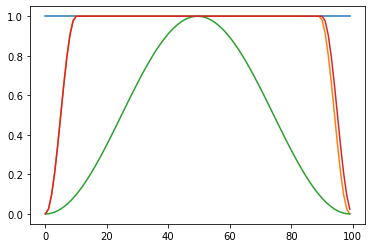

In [112]:
# Tukey window
alpha=0.2
# Tapered cosine windows
win1 = signal.tukey(len(tot),0)     # rectangular window. What we used before.
win2 = signal.tukey(len(tot),1)     # Hann window
win3 = signal.tukey(len(tot),alpha) # Cosine tapered window has 20% of the points of the Tukey window
# Tapered periodic window
win4 = signal.tukey(len(tot),alpha,sym=False)

plt.plot(ttt,win1,ttt,win3,ttt,win2,ttt,win4)


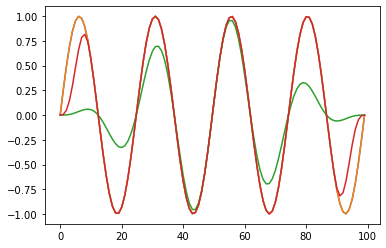

In [113]:
plt.plot(ttt,tot2)
plt.plot(ttt,win1*tot2)
plt.plot(ttt,win2*tot2)
plt.plot(ttt,win3*tot2)

(0, 5)

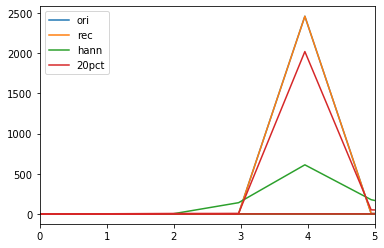

In [114]:
fc_tot2=np.fft.fft(tot2) 
fc_win1=np.fft.fft(win1*tot2) 
fc_win2=np.fft.fft(win2*tot2) 
fc_win3=np.fft.fft(win3*tot2) 

fc0_amp=fc_tot2.real**2+fc_tot2.imag**2
fc1_amp=fc_win1.real**2+fc_win1.imag**2
fc2_amp=fc_win2.real**2+fc_win2.imag**2
fc3_amp=fc_win3.real**2+fc_win3.imag**2

plt.plot(fq*T,fc0_amp,label='ori')
plt.plot(fq*T,fc1_amp,label='rec')
plt.plot(fq*T,fc2_amp,label='hann')
plt.plot(fq*T,fc3_amp,label='20pct')

plt.legend()
plt.xlim(0,5)

## Rotary spectrum

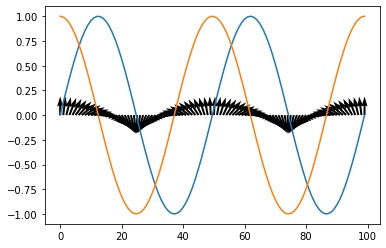

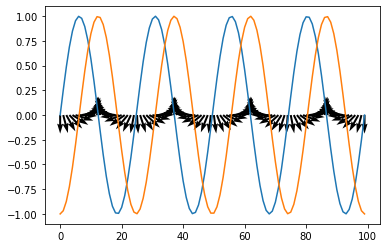

In [115]:
cos1=np.cos(fq1*2*np.pi*ttt)
cos3=(-1)*np.cos(fq3*2*np.pi*ttt)

hvel1=sin1 + 1j * cos1
hvel2=sin3 + 1j * cos3
hvel_tot=hvel1+hvel2

plt.plot(ttt,sin1,ttt,cos1)
plt.quiver(sin1,cos1)
plt.figure()
plt.plot(ttt,sin3,ttt,cos3)
plt.quiver(sin3,cos3)

In [116]:
fc_rot=np.fft.fft(hvel_tot)
#fc_rot_amp=fc_rot.real**2+fc_rot.imag**2
fc_rot_amp=np.abs(fc_rot)**2  # This does the same as above and is simpler

# Frequencies
fq=np.fft.fftfreq(ttt.shape[-1],dt)

(-5, 5)

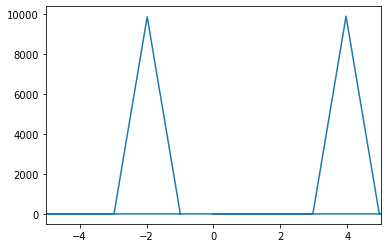

In [117]:
plt.plot(fq*T,fc_rot_amp)
plt.xlim(-5,5)